# Information about the dataset

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. 

Attribute Information
1. ID - ID number of the image
2. Clump Thickness - 1 to 10
3. Cell Size - 1 to 10
4. Cell Shape - 1 to 10
5. Marginal Adhesion - 1 to 10
6. Single Epethelial cell size - 1 to 10
7. Bare nuclei - 1 to 10 
8. Normal Nucleoli - 1 to 10
9. Bland Chromatin - 1 to 10
10. Mitosis - 1 to 10
 
Class - Dependent Variable - 2 for benign 4 for malignant

### Read the data given in bc2.csv file

In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv("bc2.csv")
df.head()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


### Observe the no.of records in dataset and type of each feature 

In [2]:
df.dtypes

ID                              int64
ClumpThickness                  int64
Cell Size                       int64
Cell Shape                      int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Normal Nucleoli                 int64
Bland Chromatin                 int64
Mitoses                         int64
Class                           int64
dtype: object

### Use summary statistics to check if missing values, outlier and encoding treament is necessary


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,699.0,1.071704e+06,617095.729819,61634.0,870688.5,1171710.0,1238298.0,13454352.0
ClumpThickness,699.0,4.417740e+00,2.815741,1.0,2.0,4.0,6.0,10.0
Cell Size,699.0,3.134478e+00,3.051459,1.0,1.0,1.0,5.0,10.0
Cell Shape,699.0,3.207439e+00,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867e+00,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023e+00,2.214300,1.0,2.0,2.0,4.0,10.0
Normal Nucleoli,699.0,3.437768e+00,2.438364,1.0,2.0,3.0,5.0,10.0
Bland Chromatin,699.0,2.866953e+00,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413e+00,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557e+00,0.951273,2.0,2.0,2.0,4.0,4.0


In [4]:
#we dont have any missing values,outliers and encoding treatment is not necessary

### Check Missing Values

In [5]:
df.isnull().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

### Check how many `?` there in Bare Nuclei feature (they are also unknown or missing values). Replace them with the top value of the describe function of Bare Nuclei feature.

#### Check include='all' parameter in describe function

In [6]:
df['Bare Nuclei'].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [7]:
top_value = df['Bare Nuclei'].describe(include = 'all').top

df['Bare Nuclei'].replace('?',top_value,inplace = True)

In [8]:
df['Bare Nuclei'].value_counts()

1     418
10    132
5      30
2      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

### Print and plot the distribution of target variable (Class - using Histogram) 

In [9]:
import matplotlib.pyplot as plt
plt.hist(df['Class'])

(array([458.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 241.]),
 array([2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. ]),
 <a list of 10 Patch objects>)

### convert the datatype of Bare Nuclei to `int`

In [10]:
df['Bare Nuclei'] = df['Bare Nuclei'].astype(int)

In [11]:
df.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.486409,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.621929,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


### Standardization of Data (Use Standard Scaler)

In [12]:
from sklearn import preprocessing
scale = preprocessing.StandardScaler()
standardized_df = scale .fit_transform(df)
print(standardized_df)

[[-0.11623873  0.20693572 -0.69999505 ... -0.61182504 -0.34391178
  -0.72539705]
 [-0.1115035   0.20693572  0.28384518 ... -0.28411186 -0.34391178
  -0.72539705]
 [-0.09126525 -0.50386559 -0.69999505 ... -0.61182504 -0.34391178
  -0.72539705]
 ...
 [-0.29657482  0.20693572  2.25152563 ...  2.33759359  0.23956962
   1.37855538]
 [-0.28254589 -0.14846494  1.59563215 ...  1.02674087 -0.34391178
   1.37855538]
 [-0.28254589 -0.14846494  1.59563215 ...  0.37131451 -0.34391178
   1.37855538]]


In [13]:
standardized_df = pd.DataFrame(standardized_df , columns = df.columns)

print(standardized_df)

           ID  ClumpThickness  Cell Size  Cell Shape  Marginal Adhesion  \
0   -0.116239        0.206936  -0.699995   -0.743299          -0.633247   
1   -0.111504        0.206936   0.283845    0.266875           0.768621   
2   -0.091265       -0.503866  -0.699995   -0.743299          -0.633247   
3   -0.089884        0.562336   1.595632    1.613773          -0.633247   
4   -0.088674       -0.148465  -0.699995   -0.743299           0.067687   
5   -0.088513        1.273138   2.251526    2.287222           1.820022   
6   -0.086929       -1.214667  -0.699995   -0.743299          -0.633247   
7   -0.086180       -0.859266  -0.699995   -0.406574          -0.633247   
8   -0.062638       -0.859266  -0.699995   -0.743299          -0.633247   
9   -0.062638       -0.148465  -0.372048   -0.743299          -0.633247   
10  -0.059062       -1.214667  -0.699995   -0.743299          -0.633247   
11  -0.057621       -0.859266  -0.699995   -0.743299          -0.633247   
12  -0.048492        0.20

### Plot Scatter Matrix to understand the distribution of variables and check if any variables are collinear and drop one of them. (Use pd.scatter matrix())

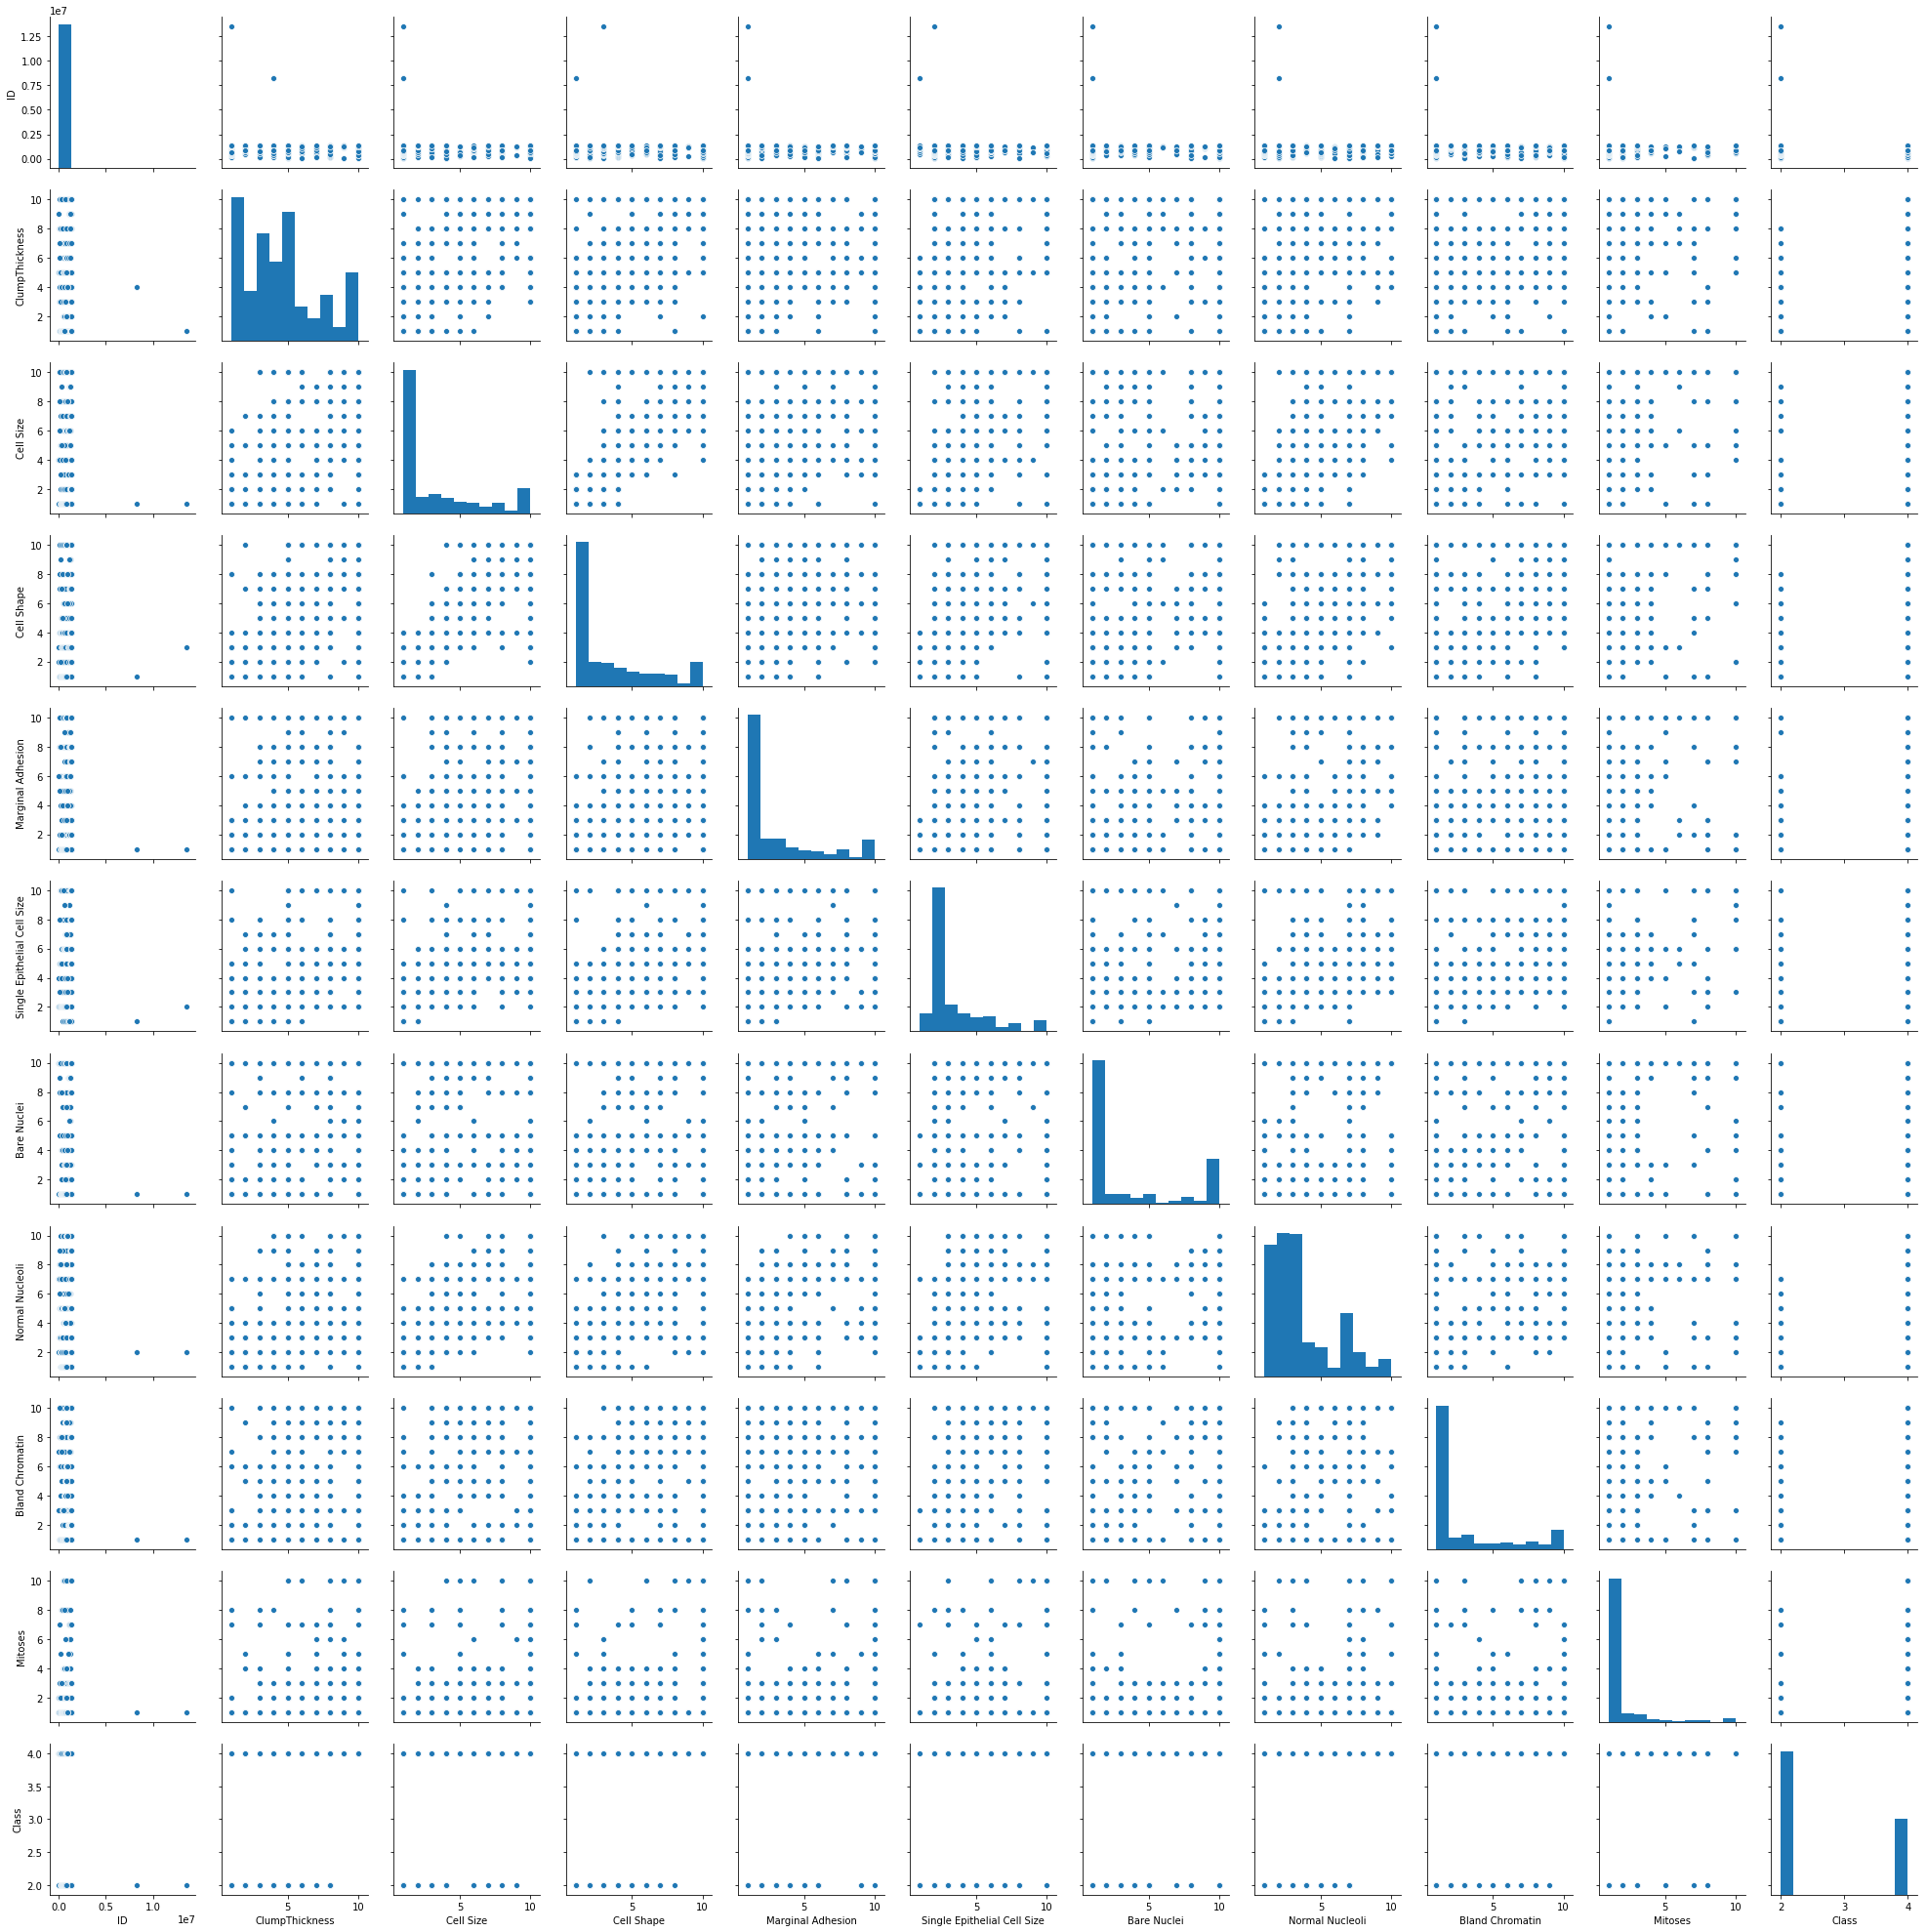

In [14]:
import seaborn as sns
sns.pairplot(df)

C:\Users\vamsi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  """Entry point for launching an IPython kernel.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000E9F5A58>,
      dtype=object)

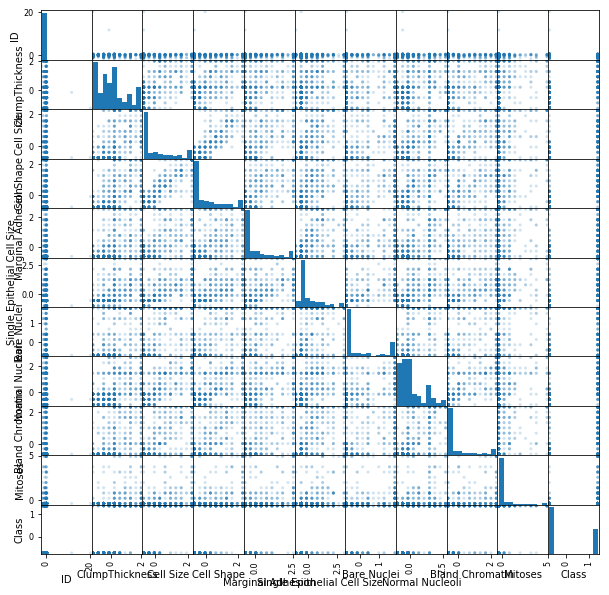

In [15]:
pd.scatter_matrix(standardized_df ,alpha = 0.2 , figsize = (10,10))

In [16]:
standardized_df.drop('Cell Shape', axis = 1 , inplace = True)


In [17]:
standardized_df.drop('ID', axis = 1 , inplace = True)


In [18]:
print(standardized_df.head())

   ClumpThickness  Cell Size  Marginal Adhesion  Single Epithelial Cell Size  \
0        0.206936  -0.699995          -0.633247                    -0.549561   
1        0.206936   0.283845           0.768621                     1.710106   
2       -0.503866  -0.699995          -0.633247                    -0.549561   
3        0.562336   1.595632          -0.633247                    -0.097628   
4       -0.148465  -0.699995           0.067687                    -0.549561   

   Bare Nuclei  Normal Nucleoli  Bland Chromatin   Mitoses     Class  
0    -0.686979        -0.179662        -0.611825 -0.343912 -0.725397  
1     1.799664        -0.179662        -0.284112 -0.343912 -0.725397  
2    -0.410685        -0.179662        -0.611825 -0.343912 -0.725397  
3     0.141902        -0.179662         1.354454 -0.343912 -0.725397  
4    -0.686979        -0.179662        -0.611825 -0.343912 -0.725397  


### Divide the dataset into feature set and target set

In [19]:
from sklearn.model_selection import train_test_split

X =  standardized_df.drop('Class',axis=1)


In [20]:
Y = standardized_df.pop('Class')

In [21]:
lab_enc = preprocessing.LabelEncoder()
Y_enc = lab_enc.fit_transform(Y)

### Divide the Training and Test sets in 70:30 

In [22]:
train_set, test_set, train_labels, test_labels = train_test_split(X, Y_enc, test_size=0.30, random_state=0)


### Model 1 : Implement a default Decision Tree model with no attributes

In [23]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(criterion = 'entropy' , random_state = 0)
dt_model.fit(train_set, train_labels)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

### Check the feature importances of the Decision Tree model

In [24]:
dt_model.feature_importances_

array([0.05325326, 0.72335547, 0.01674339, 0.01593082, 0.14164768,
       0.01366531, 0.03540407, 0.        ])

### Check the training & test accuracy of model 1 

In [25]:
from sklearn import metrics

y_pred=dt_model.predict(test_set) 
acc=metrics.accuracy_score(test_labels,y_pred)
print(acc)

0.9380952380952381


### Model 2: Implement a decision tree with depth of the tree = 10 and leaf nodes = 5

In [26]:
from sklearn.tree import DecisionTreeClassifier

dt_model2 = DecisionTreeClassifier(criterion = 'entropy' ,max_depth = 10 , max_leaf_nodes = 5 ,random_state = 0)
dt_model2.fit(train_set, train_labels)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=10,
            max_features=None, max_leaf_nodes=5, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

### Check the training & test accuracy of model 2

In [27]:
from sklearn import metrics

model2_y_pred=dt_model2.predict(test_set) 
model2_acc=metrics.accuracy_score(test_labels,model2_y_pred)
print(acc)

0.9380952380952381


### Print the confusion matrix of model 1 and model 2

In [28]:
cm1 = metrics.confusion_matrix(test_labels,y_pred)
print(cm1)

[[127   8]
 [  5  70]]


In [30]:
cm2 = metrics.confusion_matrix(test_labels,model2_y_pred)
print(cm2)

[[126   9]
 [  2  73]]
